In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [43]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sns
import matplotlib as plt
%matplotlib inline

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.preprocessing

from keras.models import Model
from keras.layers import Input, Dense, Concatenate, Reshape, Dropout
from keras.layers.embeddings import Embedding

from sklearn.model_selection import StratifiedKFold

In [33]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1980 - 2014 z rôznych štátov USA
dataset = pd.read_csv("database.csv", dtype=str)
                                             

In [34]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
dataset.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,000001,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,000002,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,000003,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,000004,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,000005,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [ ]:
column we dont need:
    Agency code
    Victim Ethnicity
    Recorn Source
    

In [35]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
dataset.shape

(638454, 24)

In [36]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný, tj neosasuje nenulove hodnoty 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  object
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  object
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  object
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  object
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [37]:
# skontrolujte, či existujú nulové hodnoty
dataset.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [40]:
# vidíme, že máme unifirmný počet záznamov,
# koľko jedinečných zázanmov existuje pre každú kategóriu
# najčastejší výskyt
# a frequencia výskytu
dataset.describe()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
count,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454,...,638454,638454,638454,638454,638454,638454,638454,638454,638454,638454
unique,638454,12003,9216,7,1782,51,35,12,1000,2,...,3,3,101,5,3,28,16,11,11,2
top,178990,NY03030,New York,Municipal Police,Los Angeles,California,1993,July,1,Murder or Manslaughter,...,Unknown,Male,0,White,Unknown,Unknown,Handgun,0,0,FBI
freq,1,38416,38416,493026,44511,99783,24335,58696,265528,629338,...,368303,399541,216327,218243,446410,273013,317484,586059,558838,616647


## 2. Pochopenie a Vizualizácia dát

<AxesSubplot:xlabel='Month', ylabel='count'>

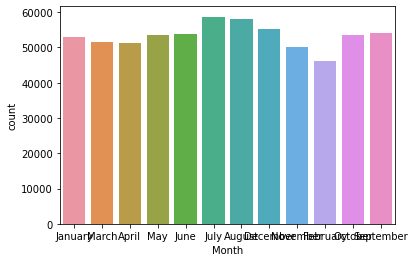

In [44]:
sns.countplot(x = 'Month', data = dataset)

<AxesSubplot:xlabel='Victim Sex', ylabel='count'>

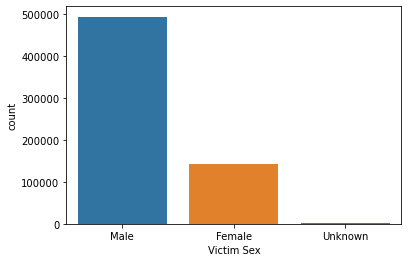

In [57]:
sns.countplot(x = 'Victim Sex', data = dataset)

<AxesSubplot:xlabel='Perpetrator Sex', ylabel='count'>

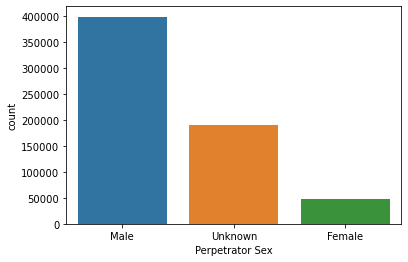

In [58]:
sns.countplot(x = 'Perpetrator Sex', data = dataset)

<AxesSubplot:xlabel='Year', ylabel='count'>

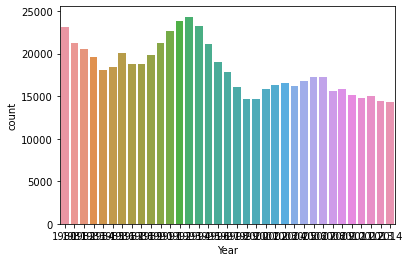

In [60]:
sns.countplot(x = 'Year', data = dataset)

In [ ]:
#sns.boxplot(x=dataset['Perpetrator Age'])

In [56]:
dataset['Year'].value_counts()

1993    24335
1992    23793
1994    23246
1980    23092
1991    22657
1990    21246
1981    21208
1995    21179
1982    20544
1986    20125
1989    19868
1983    19653
1996    18969
1987    18783
1988    18779
1985    18386
1984    18093
1997    17794
2007    17303
2006    17275
2005    16836
2003    16512
2002    16268
2004    16233
1998    16061
2009    15840
2001    15803
2008    15595
2010    15121
2012    15033
2011    14756
2000    14671
1999    14621
2013    14445
2014    14331
Name: Year, dtype: int64

## 3. Konštrukcia modelu
<ul>
    <li> Špecifikácia vstupného tvaru </li>
    <li> </li>
    <li> </li>
    <li> </li>
</ul>

## 4. Kompilácia modelu
Pred trénovaním modelu je potreba konfigurovat učiaci sa proces, pomocou kompilačnej metódy. K tomu budeme potrebovať.
<ul>
    <li> Optimizér: </li>
    <li> Loss function: </li>
    <li> Zoznam metrík: V prípade kategorického modelu ako nášho je accuracy (presnosť) </li>
    <li> </li>
</ul>

In [ ]:
model.compile()

## 5. Trenovanie modelu

## 6. Evaluacia modelu

## 7. Test predikcie